<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:104: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:104: SyntaxWarning: invalid escape sequence '\%'
C:\Users\jason\AppData\Local\Temp\ipykernel_41888\1944332603.py:2: SyntaxWarning: invalid escape sequence '\%'
  """Phase_II.ipynb
C:\Users\jason\AppData\Local\Temp\ipykernel_41888\1944332603.py:104: SyntaxWarning: invalid escape sequence '\%'
  """## Part 3:


Coordinates: 42.30000305175781°N -71.0999984741211°E
Elevation: 8.0 m asl
Timezone difference to GMT+0: 0s

Hourly data
                          date       pm10      pm2_5  carbon_monoxide  \
0   2025-11-30 00:00:00+00:00  21.700001  19.299999            387.0   
1   2025-11-30 01:00:00+00:00  23.500000  20.799999            367.0   
2   2025-11-30 02:00:00+00:00  24.200001  21.400000            314.0   
3   2025-11-30 03:00:00+00:00  24.900000  21.900000            276.0   
4   2025-11-30 04:00:00+00:00  26.100000  23.100000            274.0   
..                        ...        ...        ...              ...   
139 2025-12-05 19:00:00+00:00   8.100000   7.000000            214.0   
140 2025-12-05 20:00:00+00:00   8.000000   6.900000            222.0   
141 2025-12-05 21:00:00+00:00   8.900000   7.900000            230.0   
142 2025-12-05 22:00:00+00:00  12.900000  11.900000            240.0   
143 2025-12-05 23:00:00+00:00  13.100000  12.200000            252.0   

     carbon_di

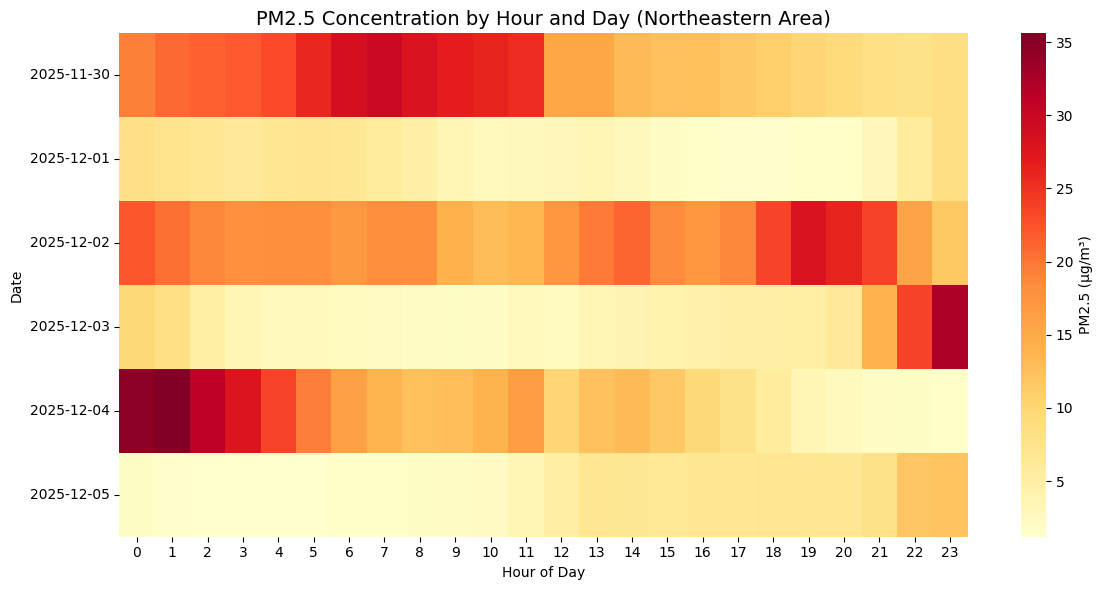

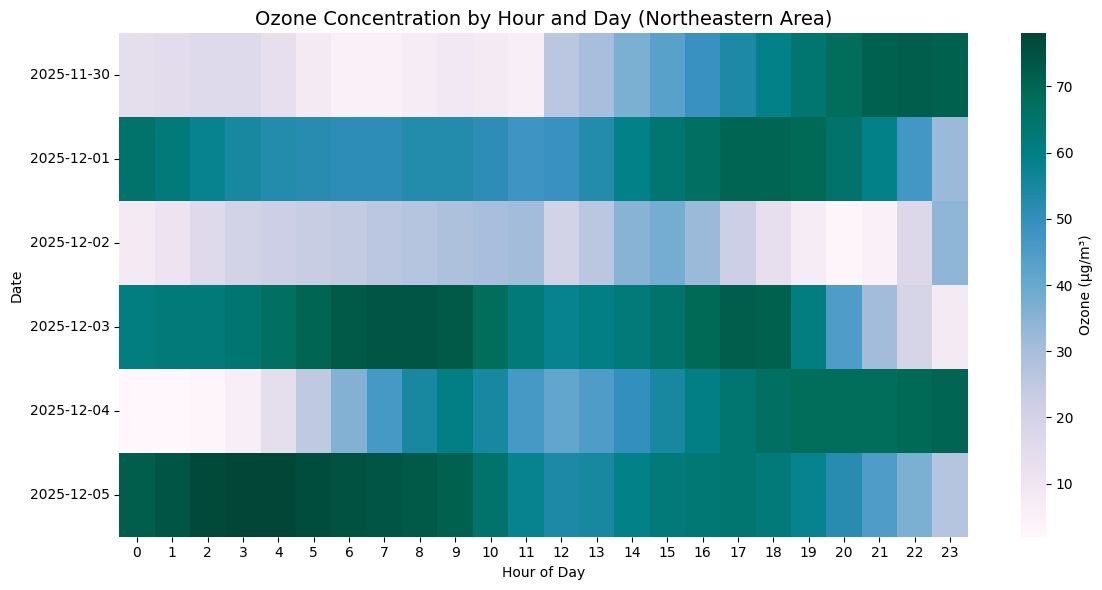

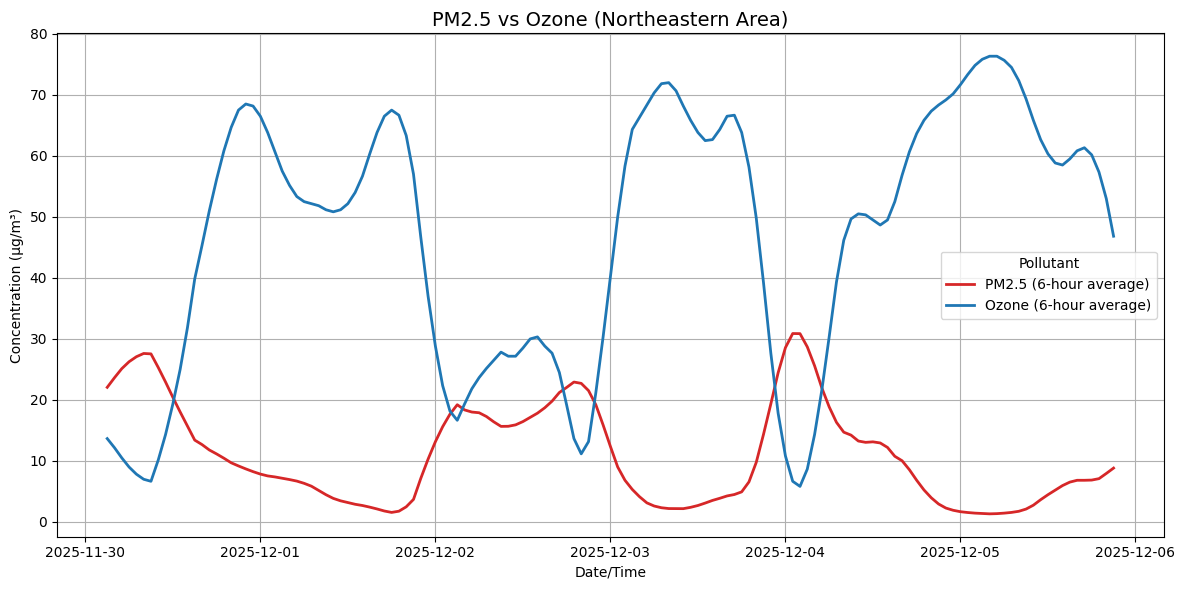

'This line plot answers our second key question: **"Can we use previous data to predict when a spike will occur in air pollution?"**\n\nIn the graph above, we\'ve converted the 6 hour timeframs of PM2.5 and ozone into averages to help simplify the data. In doing so, it is now easier to observe for trends throughout the days. This can also help determine if there are any trends or spikes for pollution at certain phases of the day everyday. For instance, PM2.5 seems to have an all time low a little before mid day 10/26/25. Based off this dip, we could anticipate what might come next based on previous data.\n\n'

In [1]:
# -*- coding: utf-8 -*-
"""Phase_II.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/15Y9Xf5aZxTs37pz4H2YNFwHnC1K9DqNC

# Phase II: Data Curation, Exploratory Analysis and Plotting (5\%)

### Team Members:
- Jason Balayev
- Jayden Ye
- Esha Kanakapura
- Ian Chung


## Part 1:
(1%) Expresses the central motivation of the project and explains the (at least) two key questions to be explored. Gives a summary of the data processing pipeline so a technical expert can easily follow along.

## Problem Motivation

Air quality and pollution directly affects health outcomes which people often overlook. Despite numerous studies and environmental movements regarding air pollution, there are still many individuals who are unaware of the importnace of air quality and how poor air quality can cause short and long term health impacts. This project focuses on how air pollution changes throughout the day to identify the environmental factors causing the pollution. By examining the hourly changes of air pollution throughout the day, and using previous air pollutiond data, we aim to predict when an air pollution spike occurs as well. In this project, we aim to use data science to see how we can observe trends in air pollution and help advocate/show others how important and significant air quality actually is.

Key Questions:

1. How does time of day affect air pollution?
2. Can we use previous data to predict when a spike will occur in air pollution?

Motivating sources:
- https://www.ehn.org/like-smoking-50-cigarrettes-daily-delhis-air-pollution-reaches-hazardous-levels
- https://www.youtube.com/watch?v=2O-k6TuMm6k

## Summary of the Data Processing Pipeline

1. Use the API to get the initial data
2. The data comes in clean from the API with no issues
3. Visualize using plotting libraries, such as Seaborn and Matplotlib

To process the data, we will use the air quality API from (https://open-meteo.com/en/docs/air-quality-api). This involves getting the API through the URL, then saving the datasets. Next, we will address our key questions. This includes extracting the hour and day of the week from the start time and calculating the pollutants to help us analyze usage patterns more effectively. After that, we will perform more data analysis to create basic statistics and visualizations. This will include a line plot showing peaks in air pollutants and geographical heatmaps (using imported libraries Seaborn, Matplotlib, and Plotly) displaying pollutant levels from two different weeks. These steps will help us address key questions related to peak air pollution and time of day. Finally, the cleaned data will be prepared for machine learning by selecting relevant features for predictive modeling of air pollution in different times of day.

## Part 2:
(2\%) Obtains, cleans, and merges all data sources involved in the project.
"""

# Commented out IPython magic to ensure Python compatibility.

# %pip install openmeteo-requests
# %pip install requests-cache retry-requests numpy pandas

import openmeteo_requests
import matplotlib.pyplot as plt
import pandas as pd
import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://air-quality-api.open-meteo.com/v1/air-quality"
params = {
	"latitude": 42.3398,
	"longitude": -71.0892,
	"hourly": ["pm10", "pm2_5", "carbon_monoxide", "carbon_dioxide", "ozone"],
	"past_days": 5,
	"forecast_days": 1,
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation: {response.Elevation()} m asl")
print(f"Timezone difference to GMT+0: {response.UtcOffsetSeconds()}s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_pm10 = hourly.Variables(0).ValuesAsNumpy()
hourly_pm2_5 = hourly.Variables(1).ValuesAsNumpy()
hourly_carbon_monoxide = hourly.Variables(2).ValuesAsNumpy()
hourly_carbon_dioxide = hourly.Variables(3).ValuesAsNumpy()
hourly_ozone = hourly.Variables(4).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["pm10"] = hourly_pm10
hourly_data["pm2_5"] = hourly_pm2_5
hourly_data["carbon_monoxide"] = hourly_carbon_monoxide
hourly_data["carbon_dioxide"] = hourly_carbon_dioxide
hourly_data["ozone"] = hourly_ozone

hourly_dataframe = pd.DataFrame(data = hourly_data)
print("\nHourly data\n", hourly_dataframe)

"""## Part 3:
(2\%) Builds at least two visualizations (graphs/plots) from the data which help to understand or answer the questions of interest. These visualizations will be graded based on how much information they can effectively communicate to readers. Please make sure your visualization are sufficiently distinct from each other.
"""

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

hourly_dataframe["date"] = pd.to_datetime(hourly_dataframe["date"])
hourly_dataframe["hour"] = hourly_dataframe["date"].dt.hour
hourly_dataframe["day"] = hourly_dataframe["date"].dt.date

pm25_pivot = hourly_dataframe.pivot_table(values="pm2_5", index="day", columns="hour", aggfunc="mean")
ozone_pivot = hourly_dataframe.pivot_table(values="ozone", index="day", columns="hour", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(pm25_pivot, cmap="YlOrRd", cbar_kws={'label': 'PM2.5 (µg/m³)'})
plt.title("PM2.5 Concentration by Hour and Day (Northeastern Area)", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Date")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(ozone_pivot, cmap="PuBuGn", cbar_kws={'label': 'Ozone (µg/m³)'})
plt.title("Ozone Concentration by Hour and Day (Northeastern Area)", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Date")
plt.tight_layout()
plt.show()

"""These heatmaps answer our first key question: **"How does time of day affect air pollution?"**

The heatmap diagrams show PM2.5 and Ozone concentrations between the different hours and days in the Northeastern University area. Darker colors show higher pollution levels and lighter colors show lower concentrations.

**PM2.5**: Darker red/orange colors indicate concentration peaks in the morning, around 3-6 AM. This happens due to the temperature rise caused by nighttime cooling, where a layer of warm air retains pollutants and cooler air close to the ground. Particulate matter builds up instead of evaporating overnight due to calm winds and decreased atmospheric mixing. Then, when scattering circumstances are at their worst, morning traffic also adds pollution.

**Ozone**: Ozone peaks have an opposite relationship with PM2.5 with darker green colors in the middle of the day. Ozone is different from PM2.5 in the sense that it needs intense sunshine to transform nitrogen oxides and volatile organic compounds into ozone. High ozone production is driven by midday UV light. Because high PM2.5 absorbs UV rays, less sunlight is available for the creation of ozone.

Sources: https://smartairfilters.com/en/blog/when-is-pm-2-5-the-lowest/?srsltid=AfmBOooDpuxYcAxmJvgS5ifuJug9WWE_TA2H6MlceFtbkin9KkeJcbE2
https://www.stateofglobalair.org/pollution-sources/ozon

"""

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

hourly_dataframe["date"] = pd.to_datetime(hourly_dataframe["date"])
hourly_dataframe = hourly_dataframe.sort_values("date")

hourly_dataframe["pm2_5_rolling"] = hourly_dataframe["pm2_5"].rolling(window=6, center=True).mean()
hourly_dataframe["ozone_rolling"] = hourly_dataframe["ozone"].rolling(window=6, center=True).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_dataframe, x="date", y="pm2_5_rolling", label="PM2.5 (6-hour average)", color="tab:red", linewidth=2)
sns.lineplot(data=hourly_dataframe, x="date", y="ozone_rolling", label="Ozone (6-hour average)", color="tab:blue", linewidth=2)

plt.title("PM2.5 vs Ozone (Northeastern Area)", fontsize=14)
plt.xlabel("Date/Time")
plt.ylabel("Concentration (µg/m³)")
plt.legend(title="Pollutant")
plt.grid(True)
plt.tight_layout()
plt.show()

"""This line plot answers our second key question: **"Can we use previous data to predict when a spike will occur in air pollution?"**

In the graph above, we've converted the 6 hour timeframs of PM2.5 and ozone into averages to help simplify the data. In doing so, it is now easier to observe for trends throughout the days. This can also help determine if there are any trends or spikes for pollution at certain phases of the day everyday. For instance, PM2.5 seems to have an all time low a little before mid day 10/26/25. Based off this dip, we could anticipate what might come next based on previous data.

"""